In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
arquivo = 'cyberattack_challenge.csv'
dataset = pd.read_csv(arquivo, sep=',' ,header=0)

In [3]:
dataset.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
0,1,15,10269,44.0,446110.0,Retail,26/10/2014,Internal - Other
1,2,39,332165,61.0,611210.0,Education,17/08/2020,Internal - Consultant
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,External - Other
3,4,10,1471919,54.0,541715.0,Professional,09/04/2011,Internal - Trusted Third Party (TTP)
4,5,1,3986,92.0,926130.0,Public,31/03/2019,Internal - Trusted Third Party (TTP)


In [4]:
dataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  int64  
 1   affected_count          10000 non-null  int64  
 2   total_amount            10000 non-null  int64  
 3   naic_sector             9865 non-null   float64
 4   naic_national_industry  9865 non-null   float64
 5   sector                  9865 non-null   object 
 6   breach_date             10000 non-null  object 
 7   cause                   9294 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 625.1+ KB


In [5]:
dataset.isnull().sum()

id                          0
affected_count              0
total_amount                0
naic_sector               135
naic_national_industry    135
sector                    135
breach_date                 0
cause                     706
dtype: int64

In [6]:
print(any(dataset.duplicated()))
# dataset = dataset.drop_duplicates()

False


In [120]:
dataset1 = dataset.dropna(axis=0, how='all')
dataset1.isnull().sum()

id                          0
affected_count              0
total_amount                0
naic_sector               135
naic_national_industry    135
sector                    135
breach_date                 0
cause                     706
dtype: int64

In [121]:
dataset1 = dataset1.loc[dataset1['affected_count'] >= 1]
dataset1

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
0,1,15,10269,44.0,446110.0,Retail,26/10/2014,Internal - Other
1,2,39,332165,61.0,611210.0,Education,17/08/2020,Internal - Consultant
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,External - Other
3,4,10,1471919,54.0,541715.0,Professional,09/04/2011,Internal - Trusted Third Party (TTP)
4,5,1,3986,92.0,926130.0,Public,31/03/2019,Internal - Trusted Third Party (TTP)
...,...,...,...,...,...,...,...,...
9995,9996,27,5791,NaN,NaN,NaN,26/01/2014,Internal - Other
9996,9997,17790,2134,56.0,561599.0,Administrative,22/09/2017,External - Former Consultant
9997,9998,45,3246,62.0,621111.0,Healthcare,14/09/2016,Internal - Trusted Third Party (TTP)
9998,9999,1515,2528131,22.0,221210.0,Utilities,05/06/2012,Internal - Employee


In [122]:
discard = ["Internal"]
dataset1 = dataset1[~dataset1.cause.str.contains('|'.join(discard),na=False)]
dataset1

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,External - Other
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,External - Former Employee
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,External - Former Consultant
9,10,62,25913,51.0,517919.0,Information,10/02/2017,External - Criminal Organization
13,14,2280,396347,23.0,237210.0,Construction,24/12/2012,External - Hacktivist
...,...,...,...,...,...,...,...,...
9989,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,External - Vendor
9990,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,External - Former Employee
9991,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,External - Criminal Organization
9993,9994,2109,117368,51.0,511210.0,Information,18/06/2013,NaN


In [123]:
dataset1['cause'] = dataset1['cause'].str.replace(r"External - ","")
dataset1

C:\Users\warri\AppData\Local\Temp/ipykernel_1640/1875750187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['cause'] = dataset1['cause'].str.replace(r"External - ","")


,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant
9,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization
13,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist
...,...,...,...,...,...,...,...,...
9989,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,Vendor
9990,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee
9991,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,Criminal Organization
9993,9994,2109,117368,51.0,511210.0,Information,18/06/2013,NaN


In [36]:
other_inv = dataset1.sort_values(by='total_amount', ascending = False)
other_inv

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
8279,8280,343444,7915369031,81.0,812113.0,Other,10/04/2020,External - Other
1382,1383,156721,2324815910,61.0,611699.0,Education,28/12/2017,External - Former Consultant
9284,9285,1081,2223175604,56.0,561110.0,Administrative,24/12/2017,External - Hacktivist
4299,4300,12217,1034862967,56.0,561110.0,Administrative,27/10/2016,External - Criminal Organization
421,422,2320670,838840340,56.0,561990.0,Administrative,28/05/2015,External - Former Consultant
...,...,...,...,...,...,...,...,...
9137,9138,5,23,51.0,517312.0,Information,03/05/2016,External - Terrorist
4969,4970,90,20,61.0,611210.0,Education,22/06/2014,External - Hacktivist
7503,7504,2,13,52.0,523910.0,Financial,09/09/2018,External - Hacktivist
228,229,1,12,52.0,522110.0,Financial,15/11/2014,NaN


#### * Quais setores foram os mais afetados?

In [11]:
dataset2 = dataset1.dropna(subset=['sector'], axis=0, how='any')
dataset2.isnull().sum()

id                          0
affected_count              0
total_amount                0
naic_sector                 0
naic_national_industry      0
sector                      0
breach_date                 0
cause                     602
dtype: int64

In [12]:
dataset2['year'] = pd.DatetimeIndex(dataset2['breach_date']).year
dataset2

C:\Users\warri\AppData\Local\Temp/ipykernel_1640/2232507923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['year'] = pd.DatetimeIndex(dataset2['breach_date']).year


,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,External - Other,2019
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,External - Former Employee,2019
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,External - Former Consultant,2014
9,10,62,25913,51.0,517919.0,Information,10/02/2017,External - Criminal Organization,2017
13,14,2280,396347,23.0,237210.0,Construction,24/12/2012,External - Hacktivist,2012
...,...,...,...,...,...,...,...,...,...
9989,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,External - Vendor,2014
9990,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,External - Former Employee,2013
9991,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,External - Criminal Organization,2013
9993,9994,2109,117368,51.0,511210.0,Information,18/06/2013,NaN,2013


In [13]:
dataset3 = pd.crosstab(dataset2["sector"], dataset2["year"],margins=True)
dataset3

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
sector,,,,,,,,,,,
Administrative,51,59,59,54,69,53,76,52,71,64,608
Agriculture,1,2,0,1,1,2,0,3,1,0,11
Construction,12,8,7,8,7,9,8,8,12,8,87
Education,39,44,42,42,35,28,48,51,50,34,413
Entertainment,8,8,6,8,8,8,15,6,9,10,86
Financial,79,64,71,72,68,81,65,65,60,65,690
Healthcare,62,61,72,51,65,58,73,64,67,67,640
Hospitality,22,28,21,23,18,23,10,22,17,20,204
Information,27,27,39,29,34,39,26,28,33,36,318


In [14]:
dataset3 = dataset3[:-1]
dataset3

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
sector,,,,,,,,,,,
Administrative,51,59,59,54,69,53,76,52,71,64,608
Agriculture,1,2,0,1,1,2,0,3,1,0,11
Construction,12,8,7,8,7,9,8,8,12,8,87
Education,39,44,42,42,35,28,48,51,50,34,413
Entertainment,8,8,6,8,8,8,15,6,9,10,86
Financial,79,64,71,72,68,81,65,65,60,65,690
Healthcare,62,61,72,51,65,58,73,64,67,67,640
Hospitality,22,28,21,23,18,23,10,22,17,20,204
Information,27,27,39,29,34,39,26,28,33,36,318


In [15]:
dataset3.to_csv('sector_year.csv', index = True);

In [16]:
arquivo = 'sector_year.csv'
dataset3 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset3

,sector,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
0,Administrative,51,59,59,54,69,53,76,52,71,64,608
1,Agriculture,1,2,0,1,1,2,0,3,1,0,11
2,Construction,12,8,7,8,7,9,8,8,12,8,87
3,Education,39,44,42,42,35,28,48,51,50,34,413
4,Entertainment,8,8,6,8,8,8,15,6,9,10,86
5,Financial,79,64,71,72,68,81,65,65,60,65,690
6,Healthcare,62,61,72,51,65,58,73,64,67,67,640
7,Hospitality,22,28,21,23,18,23,10,22,17,20,204
8,Information,27,27,39,29,34,39,26,28,33,36,318
9,Management,9,9,8,8,13,16,13,9,14,8,107


In [18]:
dataset3B = dataset3.loc[(dataset3['sector'] == "Financial") |
                         (dataset3['sector'] == "Professional") |
                         (dataset3['sector'] == "Healthcare") |
                         (dataset3['sector'] == "Administrative") |
                         (dataset3['sector'] == "Education") |
                         (dataset3['sector'] == "Public") |
                         (dataset3['sector'] == "Retail") |
                         (dataset3['sector'] == "Information") |
                         (dataset3['sector'] == "Manufacturing")]
dataset3B

,sector,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
0,Administrative,51,59,59,54,69,53,76,52,71,64,608
3,Education,39,44,42,42,35,28,48,51,50,34,413
5,Financial,79,64,71,72,68,81,65,65,60,65,690
6,Healthcare,62,61,72,51,65,58,73,64,67,67,640
8,Information,27,27,39,29,34,39,26,28,33,36,318
10,Manufacturing,27,32,29,40,35,27,31,34,32,31,318
13,Professional,72,72,52,76,53,72,66,81,69,64,677
14,Public,42,41,39,30,43,40,35,33,36,36,375
16,Retail,32,29,32,43,37,34,40,32,30,37,346


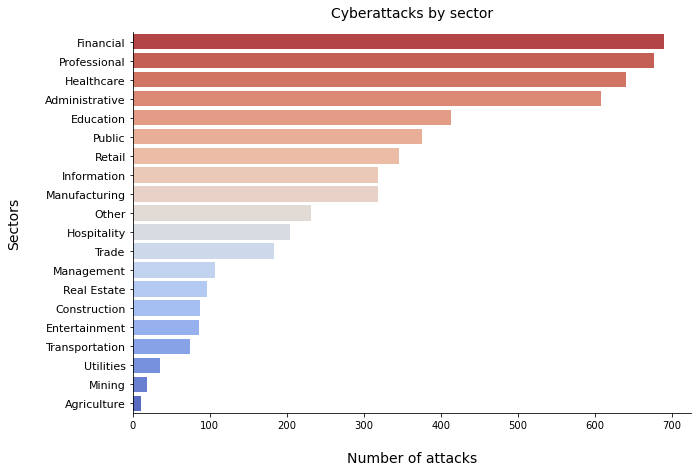

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.barplot(data=dataset3,
                 x = "All",
                 y = "sector",
                 ci = None,
                 palette = "coolwarm_r",
                 order=dataset3.sort_values('All', ascending=False).sector)

ax.set_title('Cyberattacks by sector',
             fontsize=14,
             pad=15.0)

plt.xlabel("Number of attacks",
           fontsize=14)

plt.ylabel("Sectors",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("breaches_by_sector.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

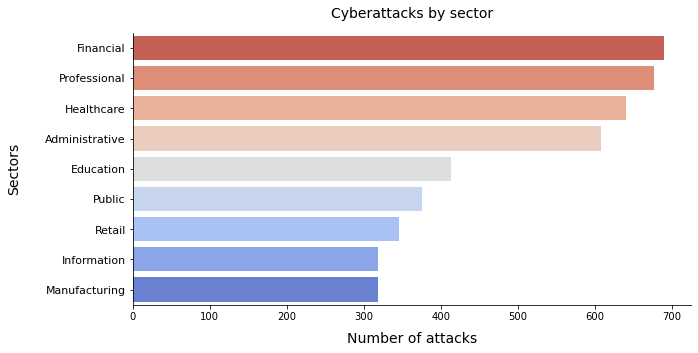

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data=dataset3B,
                 x = "All",
                 y = "sector",
                 ci = None,
                 palette = "coolwarm_r",
                 order=dataset3B.sort_values('All', ascending=False).sector)

ax.set_title('Cyberattacks by sector',
             fontsize=14,
             pad=15.0)

plt.xlabel("Number of attacks",
           fontsize=14)

plt.ylabel("Sectors",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("breaches_by_sector2.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Quantos ataques ocorreram por ano e qual a ocorrência dos ataques considerando os setores que são mais atacados?

In [9]:
dataset4 = dataset2.loc[(dataset2['sector'] == "Financial") |
                        (dataset2['sector'] == "Professional") |
                        (dataset2['sector'] == "Healthcare") |
                        (dataset2['sector'] == "Administrative") |
                        (dataset2['sector'] == "Education")]
dataset4.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,External - Other,2019
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,External - Former Employee,2019
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,External - Former Consultant,2014
14,15,636,238298,54.0,541110.0,Professional,25/03/2013,External - Former Employee,2013
16,17,8646,11080,52.0,522291.0,Financial,11/10/2017,External - Vendor,2017


In [175]:
dataset5 = pd.crosstab(dataset4["year"],dataset4["sector"],margins=False)
dataset5

sector,Administrative,Education,Financial,Healthcare,Professional
year,,,,,
2011,85,58,125,93,107
2012,95,57,99,93,109
2013,98,65,105,107,97
2014,95,66,109,84,117
2015,95,60,102,109,87
2016,90,44,124,97,123
2017,115,81,107,107,97
2018,81,65,106,95,127
2019,109,70,109,101,113


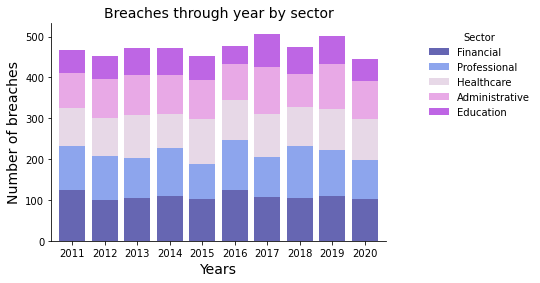

In [239]:
ax = dataset5[['Financial',
              'Professional',
              'Healthcare',
              'Administrative',
              'Education']].plot(kind='bar',
                                 stacked=True,
                                 rot=0,
                                 width = 0.8,
                                 alpha = 0.6,
                                 color = ['navy','royalblue','thistle','orchid','darkviolet'])

ax.set_title('Breaches through year by sector',
             fontsize=14)

plt.legend(loc = 'upper left',
           title='Sector',
           frameon=False,
           bbox_to_anchor=(1.1, 1.0))

plt.xlabel("Years",
           fontsize=14)

plt.ylabel("Number of breaches",
           fontsize=14)

sns.despine()

plt.savefig("breaches_through_year.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Qual a causa com maior número de registros?

In [100]:
dataset6 = dataset1.dropna(subset=['cause'], axis=0, how='any')
dataset6.isnull().sum()

id                         0
affected_count             0
total_amount               0
naic_sector               68
naic_national_industry    68
sector                    68
breach_date                0
cause                      0
dtype: int64

In [101]:
dataset6['cause'] = dataset6['cause'].str.replace(r"External - ","")
dataset6

C:\Users\warri\AppData\Local\Temp/ipykernel_14784/1411614265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset6['cause'] = dataset6['cause'].str.replace(r"External - ","")


,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant
9,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization
13,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist
...,...,...,...,...,...,...,...,...
9986,9987,15,11859,56.0,561520.0,Administrative,02/10/2019,Vendor
9989,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,Vendor
9990,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee
9991,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,Criminal Organization


In [102]:
dataset6['year'] = pd.DatetimeIndex(dataset6['breach_date']).year
dataset6

C:\Users\warri\AppData\Local\Temp/ipykernel_14784/303118018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset6['year'] = pd.DatetimeIndex(dataset6['breach_date']).year


,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other,2019
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee,2019
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant,2014
9,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization,2017
13,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist,2012
...,...,...,...,...,...,...,...,...,...
9986,9987,15,11859,56.0,561520.0,Administrative,02/10/2019,Vendor,2019
9989,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,Vendor,2014
9990,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee,2013
9991,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,Criminal Organization,2013


In [103]:
dataset7 = pd.crosstab(dataset6["cause"], dataset6["year"],margins=True)
dataset7

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
cause,,,,,,,,,,,
Criminal Organization,55,58,60,68,53,65,76,54,61,52,602
Former Consultant,69,71,55,65,68,73,68,65,45,54,633
Former Employee,62,49,70,56,49,57,54,67,75,57,596
Hacktivist,50,69,63,62,64,57,67,46,70,64,612
Nation State,65,68,61,63,60,62,66,60,60,68,633
Other,68,54,72,59,77,64,75,78,67,62,676
Terrorist,53,63,57,67,66,57,60,60,66,75,624
Vendor,66,69,51,62,56,64,51,70,64,56,609
All,488,501,489,502,493,499,517,500,508,488,4985


In [104]:
dataset7 = dataset7[:-1]
dataset7

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
cause,,,,,,,,,,,
Criminal Organization,55,58,60,68,53,65,76,54,61,52,602
Former Consultant,69,71,55,65,68,73,68,65,45,54,633
Former Employee,62,49,70,56,49,57,54,67,75,57,596
Hacktivist,50,69,63,62,64,57,67,46,70,64,612
Nation State,65,68,61,63,60,62,66,60,60,68,633
Other,68,54,72,59,77,64,75,78,67,62,676
Terrorist,53,63,57,67,66,57,60,60,66,75,624
Vendor,66,69,51,62,56,64,51,70,64,56,609


In [105]:
dataset7.to_csv('cause_year.csv', index = True);

In [106]:
arquivo = 'cause_year.csv'
dataset7 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset7

,cause,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
0,Criminal Organization,55,58,60,68,53,65,76,54,61,52,602
1,Former Consultant,69,71,55,65,68,73,68,65,45,54,633
2,Former Employee,62,49,70,56,49,57,54,67,75,57,596
3,Hacktivist,50,69,63,62,64,57,67,46,70,64,612
4,Nation State,65,68,61,63,60,62,66,60,60,68,633
5,Other,68,54,72,59,77,64,75,78,67,62,676
6,Terrorist,53,63,57,67,66,57,60,60,66,75,624
7,Vendor,66,69,51,62,56,64,51,70,64,56,609


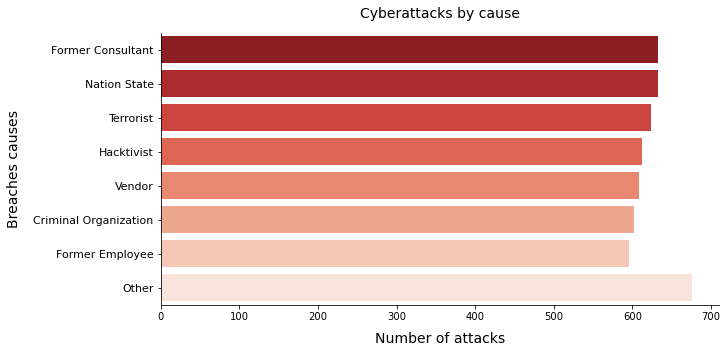

In [107]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data=dataset7,
                 x = "All",
                 y = "cause",
                 ci = None,
                 palette = "Reds_r",
                 order=['Former Consultant',
                        'Nation State',
                        'Terrorist',
                        'Hacktivist',
                        'Vendor',
                        'Criminal Organization',
                        'Former Employee',
                        'Other'])

ax.set_title('Cyberattacks by cause',
             fontsize=14,
             pad=15.0)

plt.xlabel("Number of attacks",
           fontsize=14)

plt.ylabel("Breaches causes",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.25, 0.5)

sns.despine()

plt.savefig("breaches_by_cause.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Qual é o padrão de ataque de acordo com a causa?

In [58]:
dataset8 = dataset6.loc[(dataset6['cause'] == "Former Consultant") |
                        (dataset6['cause'] == "Nation State") |
                        (dataset6['cause'] == "Terrorist") |
                        (dataset6['cause'] == "Hacktivist") |
                        (dataset6['cause'] == "Vendor") |
                        (dataset6['cause'] == "Criminal Organization") |
                        (dataset6['cause'] == "Former Employee")]
dataset8.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee,2019
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant,2014
9,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization,2017
13,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist,2012
14,15,636,238298,54.0,541110.0,Professional,25/03/2013,Former Employee,2013


In [59]:
dataset8 = dataset8.loc[(dataset8['sector'] == "Financial") |
                        (dataset8['sector'] == "Professional") |
                        (dataset8['sector'] == "Healthcare") |
                        (dataset8['sector'] == "Administrative") |
                        (dataset8['sector'] == "Education")]
dataset8.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee,2019
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant,2014
14,15,636,238298,54.0,541110.0,Professional,25/03/2013,Former Employee,2013
16,17,8646,11080,52.0,522291.0,Financial,11/10/2017,Vendor,2017
17,18,1369,535985,56.0,561510.0,Administrative,07/04/2014,Terrorist,2014


In [60]:
dataset9 = pd.crosstab(dataset8["cause"],dataset8["sector"],margins=False)
dataset9

sector,Administrative,Education,Financial,Healthcare,Professional
cause,,,,,
Criminal Organization,56,38,72,72,80
Former Consultant,84,41,74,75,78
Former Employee,70,47,75,65,62
Hacktivist,60,55,84,72,70
Nation State,56,45,80,67,82
Terrorist,65,54,75,80,64
Vendor,82,52,78,57,64


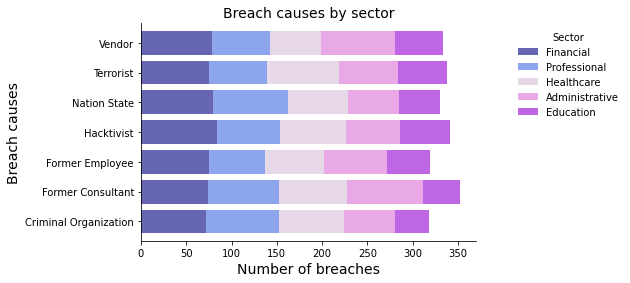

In [186]:
ax = dataset9[['Financial',
              'Professional',
              'Healthcare',
              'Administrative',
              'Education']].plot(kind='barh',
                                 stacked=True,
                                 rot=0,
                                 width = 0.8,
                                 alpha = 0.6,
                                 color = ['navy','royalblue','thistle','orchid','darkviolet'])

ax.set_title('Breach causes by sector',
             fontsize=14)

plt.legend(loc = 'upper left',
           title='Sector',
           frameon=False,
           bbox_to_anchor=(1.1, 1.0))

plt.xlabel("Number of breaches",
           fontsize=14)

plt.ylabel("Breach causes",
           fontsize=14)

sns.despine()

plt.savefig("causes_by_sector.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Qual o custo acumulado das invasões ocorridas até aqui?

In [22]:
dataset10 = dataset1.dropna(subset=['sector'], axis=0, how='any')
dataset10.isnull().sum()

id                          0
affected_count              0
total_amount                0
naic_sector                 0
naic_national_industry      0
sector                      0
breach_date                 0
cause                     602
dtype: int64

In [23]:
dataset11 = dataset10.groupby(['sector']).sum()
dataset11

,id,affected_count,total_amount,naic_sector,naic_national_industry
sector,,,,,
Administrative,2927224,5542869,5731390927,34048.0,341468141.0
Agriculture,59456,14810,3380740,121.0,1235668.0
Construction,477105,802537,225052133,2001.0,20647859.0
Education,2030370,6051383,3402988474,25193.0,252452946.0
Entertainment,405448,5372812,136889333,6106.0,61260802.0
Financial,3549792,24807092,1422225047,35880.0,360915287.0
Healthcare,3281962,6656299,2320553064,39680.0,398033580.0
Hospitality,1029220,609468,617688844,14688.0,147285307.0
Information,1540802,1848228,1732474660,16218.0,163983452.0


In [24]:
dataset11.to_csv('totalcost_sector.csv', index = True);

In [25]:
arquivo = 'totalcost_sector.csv'
dataset11 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset11

,sector,id,affected_count,total_amount,naic_sector,naic_national_industry
0,Administrative,2927224,5542869,5731390927,34048.0,341468141.0
1,Agriculture,59456,14810,3380740,121.0,1235668.0
2,Construction,477105,802537,225052133,2001.0,20647859.0
3,Education,2030370,6051383,3402988474,25193.0,252452946.0
4,Entertainment,405448,5372812,136889333,6106.0,61260802.0
5,Financial,3549792,24807092,1422225047,35880.0,360915287.0
6,Healthcare,3281962,6656299,2320553064,39680.0,398033580.0
7,Hospitality,1029220,609468,617688844,14688.0,147285307.0
8,Information,1540802,1848228,1732474660,16218.0,163983452.0
9,Management,548192,882680,354689448,5885.0,58968970.0


In [26]:
dataset11['total_amount_billion'] = dataset11['total_amount']/1000000000
dataset11

,sector,id,affected_count,total_amount,naic_sector,naic_national_industry,total_amount_billion
0,Administrative,2927224,5542869,5731390927,34048.0,341468141.0,5.731391
1,Agriculture,59456,14810,3380740,121.0,1235668.0,0.003381
2,Construction,477105,802537,225052133,2001.0,20647859.0,0.225052
3,Education,2030370,6051383,3402988474,25193.0,252452946.0,3.402988
4,Entertainment,405448,5372812,136889333,6106.0,61260802.0,0.136889
5,Financial,3549792,24807092,1422225047,35880.0,360915287.0,1.422225
6,Healthcare,3281962,6656299,2320553064,39680.0,398033580.0,2.320553
7,Hospitality,1029220,609468,617688844,14688.0,147285307.0,0.617689
8,Information,1540802,1848228,1732474660,16218.0,163983452.0,1.732475
9,Management,548192,882680,354689448,5885.0,58968970.0,0.354689


In [32]:
dataset11B = dataset11.loc[(dataset11['sector'] == "Other") |
                         (dataset11['sector'] == "Administrative") |
                         (dataset11['sector'] == "Education") |
                         (dataset11['sector'] == "Professional") |
                         (dataset11['sector'] == "Healthcare") |
                         (dataset11['sector'] == "Financial") |
                         (dataset11['sector'] == "Retail") |
                         (dataset11['sector'] == "Information") |
                         (dataset11['sector'] == "Public")]
dataset11B

,sector,id,affected_count,total_amount,naic_sector,naic_national_industry,total_amount_billion
0,Administrative,2927224,5542869,5731390927,34048.0,341468141.0,5.731391
3,Education,2030370,6051383,3402988474,25193.0,252452946.0,3.402988
5,Financial,3549792,24807092,1422225047,35880.0,360915287.0,1.422225
6,Healthcare,3281962,6656299,2320553064,39680.0,398033580.0,2.320553
8,Information,1540802,1848228,1732474660,16218.0,163983452.0,1.732475
12,Other,1201214,1854537,8600071369,18792.0,188687755.0,8.600071
13,Professional,3469245,6932650,2864982331,36558.0,366560054.0,2.864982
14,Public,1830653,1821065,1061375677,34500.0,345751290.0,1.061376
16,Retail,1731292,11268327,1660000772,15318.0,154720798.0,1.660001


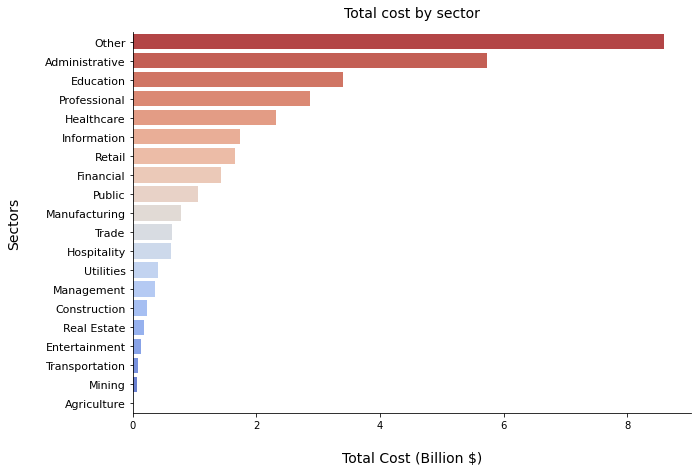

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.barplot(data=dataset11,
                 x = "total_amount_billion",
                 y = "sector",
                 ci = None,
                 palette = "coolwarm_r",
                 order=dataset11.sort_values('total_amount_billion', ascending=False).sector)


ax.set_title('Total cost by sector',
             fontsize=14,
             pad=15.0)

plt.xlabel("Total Cost (Billion $)",
           fontsize=14)

plt.ylabel("Sectors",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("cost_by_sector.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

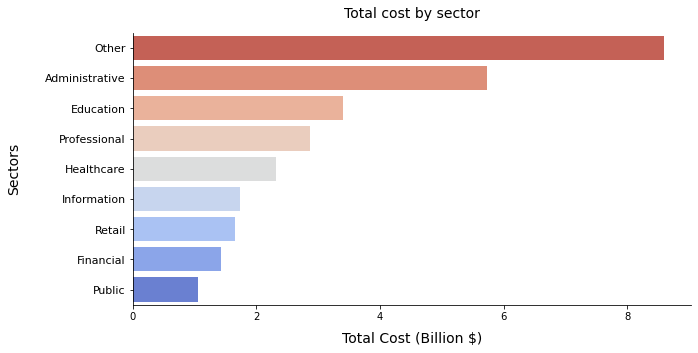

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data=dataset11B,
                 x = "total_amount_billion",
                 y = "sector",
                 ci = None,
                 palette = "coolwarm_r",
                 order=dataset11B.sort_values('total_amount_billion', ascending=False).sector)


ax.set_title('Total cost by sector',
             fontsize=14,
             pad=15.0)

plt.xlabel("Total Cost (Billion $)",
           fontsize=14)

plt.ylabel("Sectors",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("cost_by_sector2.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Qual o impacto que cada tipo de invasão já gerou sobre os custos? 

In [84]:
dataset12 = dataset1.dropna(subset=['cause'], axis=0, how='any')
dataset12.isnull().sum()

id                         0
affected_count             0
total_amount               0
naic_sector               68
naic_national_industry    68
sector                    68
breach_date                0
cause                      0
dtype: int64

In [85]:
dataset12['cause'] = dataset12['cause'].str.replace(r"External - ","")
dataset12

C:\Users\warri\AppData\Local\Temp/ipykernel_1640/3884257080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset12['cause'] = dataset12['cause'].str.replace(r"External - ","")


,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant
9,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization
13,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist
...,...,...,...,...,...,...,...,...
9986,9987,15,11859,56.0,561520.0,Administrative,02/10/2019,Vendor
9989,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,Vendor
9990,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee
9991,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,Criminal Organization


In [86]:
dataset12 = dataset12[dataset12.total_amount != 7915369031]
dataset12

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant
9,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization
13,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist
...,...,...,...,...,...,...,...,...
9986,9987,15,11859,56.0,561520.0,Administrative,02/10/2019,Vendor
9989,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,Vendor
9990,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee
9991,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,Criminal Organization


In [87]:
dataset12 = dataset12.groupby(['cause']).sum()
dataset12

,id,affected_count,total_amount,naic_sector,naic_national_industry
cause,,,,,
Criminal Organization,3135626,12511060,2765769398,33414.0,335788928.0
Former Consultant,3292453,7223709,4211158808,35400.0,355617584.0
Former Employee,2891954,9049815,2651834556,33320.0,334790993.0
Hacktivist,3119165,3578910,4898139274,34176.0,343339252.0
Nation State,3202351,12794653,1855010907,35453.0,356262110.0
Other,3417432,8313308,2308069214,37721.0,378999559.0
Terrorist,3037829,8990928,1381192220,35239.0,354083586.0
Vendor,2960350,5265358,2841383706,34253.0,344182149.0


In [88]:
dataset12.to_csv('totalcost_cause.csv', index = True);

In [89]:
arquivo = 'totalcost_cause.csv'
dataset12 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset12

,cause,id,affected_count,total_amount,naic_sector,naic_national_industry
0,Criminal Organization,3135626,12511060,2765769398,33414.0,335788928.0
1,Former Consultant,3292453,7223709,4211158808,35400.0,355617584.0
2,Former Employee,2891954,9049815,2651834556,33320.0,334790993.0
3,Hacktivist,3119165,3578910,4898139274,34176.0,343339252.0
4,Nation State,3202351,12794653,1855010907,35453.0,356262110.0
5,Other,3417432,8313308,2308069214,37721.0,378999559.0
6,Terrorist,3037829,8990928,1381192220,35239.0,354083586.0
7,Vendor,2960350,5265358,2841383706,34253.0,344182149.0


In [90]:
dataset12['total_amount_billion'] = dataset12['total_amount']/1000000000
dataset12

,cause,id,affected_count,total_amount,naic_sector,naic_national_industry,total_amount_billion
0,Criminal Organization,3135626,12511060,2765769398,33414.0,335788928.0,2.765769
1,Former Consultant,3292453,7223709,4211158808,35400.0,355617584.0,4.211159
2,Former Employee,2891954,9049815,2651834556,33320.0,334790993.0,2.651835
3,Hacktivist,3119165,3578910,4898139274,34176.0,343339252.0,4.898139
4,Nation State,3202351,12794653,1855010907,35453.0,356262110.0,1.855011
5,Other,3417432,8313308,2308069214,37721.0,378999559.0,2.308069
6,Terrorist,3037829,8990928,1381192220,35239.0,354083586.0,1.381192
7,Vendor,2960350,5265358,2841383706,34253.0,344182149.0,2.841384


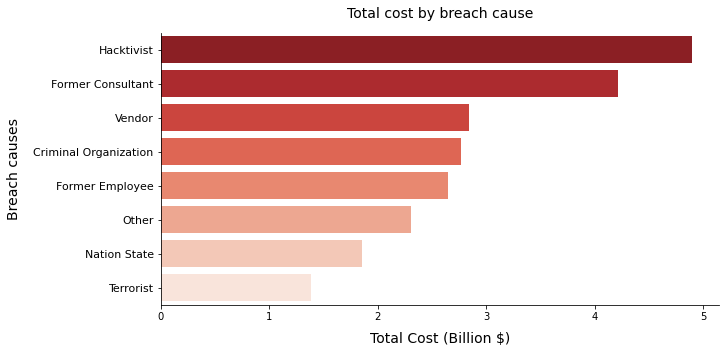

In [92]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data=dataset12,
                 x = "total_amount_billion",
                 y = "cause",
                 ci = None,
                 palette = "Reds_r",
                 order=dataset12.sort_values('total_amount_billion', ascending=False).cause)


ax.set_title('Total cost by breach cause',
             fontsize=14,
             pad=15.0)

plt.xlabel("Total Cost (Billion $)",
           fontsize=14)

plt.ylabel("Breach causes",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.25, 0.5)

sns.despine()

plt.savefig("cost_by_cause.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Qual o impacto financeiro de cada invasão por setor?

In [50]:
dataset13 = dataset1.dropna(subset=['sector'], axis=0, how='any')
dataset13.isnull().sum()

id                          0
affected_count              0
total_amount                0
naic_sector                 0
naic_national_industry      0
sector                      0
breach_date                 0
cause                     602
dtype: int64

In [51]:
dataset14 = dataset13[['sector','total_amount']]
dataset14

,sector,total_amount
2,Administrative,4473
5,Professional,438795
6,Administrative,71743
9,Information,25913
13,Construction,396347
...,...,...
9989,Hospitality,23503
9990,Administrative,9163116
9991,Financial,4017792
9993,Information,117368


In [123]:
group1 = dataset14.groupby(['sector']).sum()
group1

,total_amount
sector,
Administrative,5731390927
Agriculture,3380740
Construction,225052133
Education,3402988474
Entertainment,136889333
Financial,1422225047
Healthcare,2320553064
Hospitality,617688844
Information,1732474660


In [124]:
group1.to_csv('totalcost_sector.csv', index = True);

In [59]:
arquivo = 'totalcost_sector.csv'
dataset15 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset15

,sector,id,affected_count,total_amount,naic_sector,naic_national_industry
0,Administrative,2927224,5542869,5731390927,34048.0,341468141.0
1,Agriculture,59456,14810,3380740,121.0,1235668.0
2,Construction,477105,802537,225052133,2001.0,20647859.0
3,Education,2030370,6051383,3402988474,25193.0,252452946.0
4,Entertainment,405448,5372812,136889333,6106.0,61260802.0
5,Financial,3549792,24807092,1422225047,35880.0,360915287.0
6,Healthcare,3281962,6656299,2320553064,39680.0,398033580.0
7,Hospitality,1029220,609468,617688844,14688.0,147285307.0
8,Information,1540802,1848228,1732474660,16218.0,163983452.0
9,Management,548192,882680,354689448,5885.0,58968970.0


In [60]:
group2 = dataset14.groupby(['sector']).size()
group2

sector
Administrative    608
Agriculture        11
Construction       87
Education         413
Entertainment      86
Financial         690
Healthcare        640
Hospitality       204
Information       318
Management        107
Manufacturing     318
Mining             19
Other             232
Professional      677
Public            375
Real Estate        96
Retail            346
Trade             183
Transportation     74
Utilities          35
dtype: int64

In [61]:
dataset16 = group2.to_frame(name='breaches').reset_index()
dataset16

,sector,breaches
0,Administrative,608
1,Agriculture,11
2,Construction,87
3,Education,413
4,Entertainment,86
5,Financial,690
6,Healthcare,640
7,Hospitality,204
8,Information,318
9,Management,107


In [62]:
dataset16['total_amount'] = dataset15['total_amount']
dataset16

,sector,breaches,total_amount
0,Administrative,608,5731390927
1,Agriculture,11,3380740
2,Construction,87,225052133
3,Education,413,3402988474
4,Entertainment,86,136889333
5,Financial,690,1422225047
6,Healthcare,640,2320553064
7,Hospitality,204,617688844
8,Information,318,1732474660
9,Management,107,354689448


In [156]:
dataset16['total_amount_million'] = dataset16['total_amount']/1000000
dataset16

,sector,breaches,total_amount,total_amount_million
0,Administrative,608,5731390927,5731.390927
1,Agriculture,11,3380740,3.380740
2,Construction,87,225052133,225.052133
3,Education,413,3402988474,3402.988474
4,Entertainment,86,136889333,136.889333
5,Financial,690,1422225047,1422.225047
6,Healthcare,640,2320553064,2320.553064
7,Hospitality,204,617688844,617.688844
8,Information,318,1732474660,1732.474660
9,Management,107,354689448,354.689448


In [157]:
dataset16['eff_rate'] = dataset16['total_amount_million']/dataset16['breaches']
dataset16

,sector,breaches,total_amount,total_amount_million,eff_rate
0,Administrative,608,5731390927,5731.390927,9.426630
1,Agriculture,11,3380740,3.380740,0.307340
2,Construction,87,225052133,225.052133,2.586806
3,Education,413,3402988474,3402.988474,8.239682
4,Entertainment,86,136889333,136.889333,1.591736
5,Financial,690,1422225047,1422.225047,2.061196
6,Healthcare,640,2320553064,2320.553064,3.625864
7,Hospitality,204,617688844,617.688844,3.027886
8,Information,318,1732474660,1732.474660,5.448034
9,Management,107,354689448,354.689448,3.314855


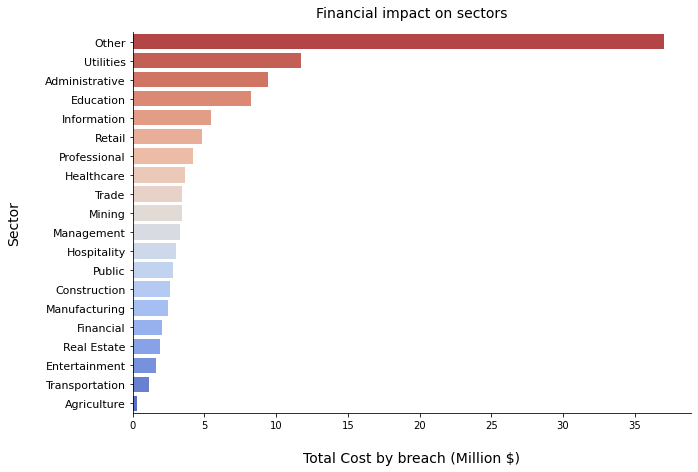

In [188]:
fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.barplot(data=dataset16,
                 x = "eff_rate",
                 y = "sector",
                 ci = None,
                 palette = "coolwarm_r",
                 order=dataset16.sort_values('eff_rate', ascending=False).sector)


ax.set_title('Financial impact on sectors',
             fontsize=14,
             pad=15.0)

plt.xlabel("Total Cost by breach (Million $)",
           fontsize=14)

plt.ylabel("Sector",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("financialimpact_by_sector.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Qual o impacto financeiro de cada invasão por causa?

In [94]:
dataset17 = dataset1.dropna(subset=['cause'], axis=0, how='any')
dataset17.isnull().sum()

id                         0
affected_count             0
total_amount               0
naic_sector               68
naic_national_industry    68
sector                    68
breach_date                0
cause                      0
dtype: int64

In [95]:
dataset18 = dataset17[['cause','total_amount']]
dataset18

,cause,total_amount
2,External - Other,4473
5,External - Former Employee,438795
6,External - Former Consultant,71743
9,External - Criminal Organization,25913
13,External - Hacktivist,396347
...,...,...
9986,External - Vendor,11859
9989,External - Vendor,23503
9990,External - Former Employee,9163116
9991,External - Criminal Organization,4017792


In [96]:
dataset18['cause'] = dataset18['cause'].str.replace(r"External - ","")
dataset18

C:\Users\warri\AppData\Local\Temp/ipykernel_1640/1600262903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset18['cause'] = dataset18['cause'].str.replace(r"External - ","")


,cause,total_amount
2,Other,4473
5,Former Employee,438795
6,Former Consultant,71743
9,Criminal Organization,25913
13,Hacktivist,396347
...,...,...
9986,Vendor,11859
9989,Vendor,23503
9990,Former Employee,9163116
9991,Criminal Organization,4017792


In [97]:
dataset18 = dataset18[dataset18.total_amount != 7915369031]
dataset18

,cause,total_amount
2,Other,4473
5,Former Employee,438795
6,Former Consultant,71743
9,Criminal Organization,25913
13,Hacktivist,396347
...,...,...
9986,Vendor,11859
9989,Vendor,23503
9990,Former Employee,9163116
9991,Criminal Organization,4017792


In [98]:
group1 = dataset18.groupby(['cause']).sum()
group1

,total_amount
cause,
Criminal Organization,2765769398
Former Consultant,4211158808
Former Employee,2651834556
Hacktivist,4898139274
Nation State,1855010907
Other,2308069214
Terrorist,1381192220
Vendor,2841383706


In [99]:
group1.to_csv('totalcost_cause.csv', index = True);

In [100]:
arquivo = 'totalcost_sector.csv'
dataset19 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset19

,sector,id,affected_count,total_amount,naic_sector,naic_national_industry
0,Administrative,2927224,5542869,5731390927,34048.0,341468141.0
1,Agriculture,59456,14810,3380740,121.0,1235668.0
2,Construction,477105,802537,225052133,2001.0,20647859.0
3,Education,2030370,6051383,3402988474,25193.0,252452946.0
4,Entertainment,405448,5372812,136889333,6106.0,61260802.0
5,Financial,3549792,24807092,1422225047,35880.0,360915287.0
6,Healthcare,3281962,6656299,2320553064,39680.0,398033580.0
7,Hospitality,1029220,609468,617688844,14688.0,147285307.0
8,Information,1540802,1848228,1732474660,16218.0,163983452.0
9,Management,548192,882680,354689448,5885.0,58968970.0


In [101]:
group2 = dataset18.groupby(['cause']).size()
group2

cause
Criminal Organization    602
Former Consultant        633
Former Employee          596
Hacktivist               612
Nation State             633
Other                    675
Terrorist                624
Vendor                   609
dtype: int64

In [102]:
dataset20 = group2.to_frame(name='breaches').reset_index()
dataset20

,cause,breaches
0,Criminal Organization,602
1,Former Consultant,633
2,Former Employee,596
3,Hacktivist,612
4,Nation State,633
5,Other,675
6,Terrorist,624
7,Vendor,609


In [103]:
dataset20['total_amount'] = dataset19['total_amount']
dataset20

,cause,breaches,total_amount
0,Criminal Organization,602,5731390927
1,Former Consultant,633,3380740
2,Former Employee,596,225052133
3,Hacktivist,612,3402988474
4,Nation State,633,136889333
5,Other,675,1422225047
6,Terrorist,624,2320553064
7,Vendor,609,617688844


In [104]:
dataset20['total_amount_million'] = dataset20['total_amount']/1000000
dataset20

,cause,breaches,total_amount,total_amount_million
0,Criminal Organization,602,5731390927,5731.390927
1,Former Consultant,633,3380740,3.380740
2,Former Employee,596,225052133,225.052133
3,Hacktivist,612,3402988474,3402.988474
4,Nation State,633,136889333,136.889333
5,Other,675,1422225047,1422.225047
6,Terrorist,624,2320553064,2320.553064
7,Vendor,609,617688844,617.688844


In [105]:
dataset20['eff_rate'] = dataset20['total_amount_million']/dataset20['breaches']
dataset20

,cause,breaches,total_amount,total_amount_million,eff_rate
0,Criminal Organization,602,5731390927,5731.390927,9.520583
1,Former Consultant,633,3380740,3.380740,0.005341
2,Former Employee,596,225052133,225.052133,0.377604
3,Hacktivist,612,3402988474,3402.988474,5.560439
4,Nation State,633,136889333,136.889333,0.216255
5,Other,675,1422225047,1422.225047,2.107000
6,Terrorist,624,2320553064,2320.553064,3.718835
7,Vendor,609,617688844,617.688844,1.014267


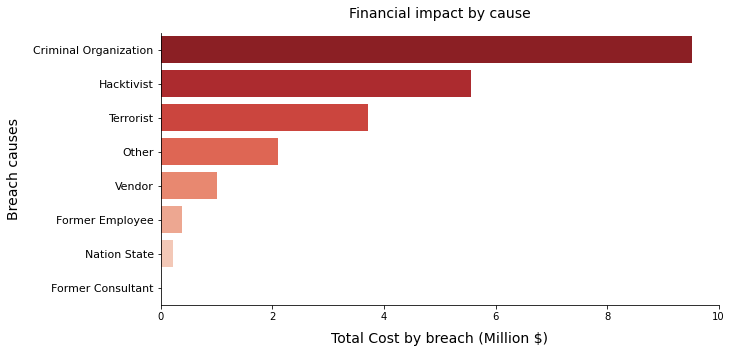

In [110]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data=dataset20,
                 x = "eff_rate",
                 y = "cause",
                 ci = None,
                 palette = "Reds_r",
                 order=dataset20.sort_values('eff_rate', ascending=False).cause)


ax.set_title('Financial impact by cause',
             fontsize=14,
             pad=15.0)

plt.xlabel("Total Cost by breach (Million $)",
           fontsize=14)

plt.ylabel("Breach causes",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.25, 0.5)
ax.set_xlim([0.0, 10.0])

sns.despine()

plt.savefig("financialimpact_by_cause.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Como as causas estão distribuídas nos setores "Outros" e "Adminstrative"? Quanto cada grupo impacta financeiramente nessas invasões?

In [38]:
dataset21 = dataset1.loc[(dataset1['sector'] == "Other") |
                         (dataset1['sector'] == "Administrative")]
dataset21.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,External - Other
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,External - Former Consultant
17,18,1369,535985,56.0,561510.0,Administrative,07/04/2014,External - Terrorist
23,24,160,835181,81.0,813410.0,Other,02/02/2015,External - Criminal Organization
25,26,2672,70593,81.0,813110.0,Other,24/10/2014,External - Nation State


In [39]:
dataset22 = dataset21.dropna(subset=['cause'], axis=0, how='any')
dataset22.isnull().sum()

id                        0
affected_count            0
total_amount              0
naic_sector               0
naic_national_industry    0
sector                    0
breach_date               0
cause                     0
dtype: int64

In [40]:
dataset22['cause'] = dataset22['cause'].str.replace(r"External - ","")
dataset22

C:\Users\warri\AppData\Local\Temp/ipykernel_1640/4069807553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset22['cause'] = dataset22['cause'].str.replace(r"External - ","")


,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant
17,18,1369,535985,56.0,561510.0,Administrative,07/04/2014,Terrorist
23,24,160,835181,81.0,813410.0,Other,02/02/2015,Criminal Organization
25,26,2672,70593,81.0,813110.0,Other,24/10/2014,Nation State
...,...,...,...,...,...,...,...,...
9980,9981,1,551,56.0,561440.0,Administrative,18/06/2014,Terrorist
9985,9986,12,71537,56.0,561990.0,Administrative,25/11/2018,Nation State
9986,9987,15,11859,56.0,561520.0,Administrative,02/10/2019,Vendor
9990,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee


In [48]:
dataset23 = dataset22[['sector','total_amount','cause']]
dataset23

,sector,total_amount,cause
2,Administrative,4473,Other
6,Administrative,71743,Former Consultant
17,Administrative,535985,Terrorist
23,Other,835181,Criminal Organization
25,Other,70593,Nation State
29,Administrative,23519,Terrorist
34,Administrative,25835,Criminal Organization
43,Other,10727,Former Employee
45,Administrative,2639,Terrorist
50,Administrative,34334,Nation State


In [224]:
group1 = dataset22.groupby(['sector','cause']).size()
group1

sector          cause                
Administrative  Criminal Organization    56
                Former Consultant        84
                Former Employee          70
                Hacktivist               60
                Nation State             56
                Other                    78
                Terrorist                65
                Vendor                   82
Other           Criminal Organization    29
                Former Consultant        21
                Former Employee          23
                Hacktivist               23
                Nation State             28
                Other                    30
                Terrorist                32
                Vendor                   19
dtype: int64

In [227]:
dataset24 = group1.to_frame(name='breaches').reset_index()
dataset24

,sector,cause,breaches
0,Administrative,Criminal Organization,56
1,Administrative,Former Consultant,84
2,Administrative,Former Employee,70
3,Administrative,Hacktivist,60
4,Administrative,Nation State,56
5,Administrative,Other,78
6,Administrative,Terrorist,65
7,Administrative,Vendor,82
8,Other,Criminal Organization,29
9,Other,Former Consultant,21


In [231]:
group2 = dataset23.groupby(['sector','cause']).sum()
group2

total_amount
sector         cause                              
Administrative Criminal Organization    1143367621
               Former Consultant         975287406
               Former Employee           488438841
               Hacktivist               2300555480
               Nation State               50063855
               Other                     348723629
               Terrorist                 184556889
               Vendor                    120248819
Other          Criminal Organization      47863593
               Former Consultant          33299387
               Former Employee            15945120
               Hacktivist                 25498382
               Nation State              160273371
               Other                    8028510786
               Terrorist                 140789432
               Vendor                     21685411

In [232]:
group2.to_csv('totalcost_cause2.csv', index = True);

In [233]:
arquivo = 'totalcost_cause2.csv'
dataset25 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset25

,sector,cause,total_amount
0,Administrative,Criminal Organization,1143367621
1,Administrative,Former Consultant,975287406
2,Administrative,Former Employee,488438841
3,Administrative,Hacktivist,2300555480
4,Administrative,Nation State,50063855
5,Administrative,Other,348723629
6,Administrative,Terrorist,184556889
7,Administrative,Vendor,120248819
8,Other,Criminal Organization,47863593
9,Other,Former Consultant,33299387


In [234]:
dataset25['breaches'] = dataset24['breaches']
dataset25

,sector,cause,total_amount,breaches
0,Administrative,Criminal Organization,1143367621,56
1,Administrative,Former Consultant,975287406,84
2,Administrative,Former Employee,488438841,70
3,Administrative,Hacktivist,2300555480,60
4,Administrative,Nation State,50063855,56
5,Administrative,Other,348723629,78
6,Administrative,Terrorist,184556889,65
7,Administrative,Vendor,120248819,82
8,Other,Criminal Organization,47863593,29
9,Other,Former Consultant,33299387,21


In [266]:
dataset25['total_amount_million'] = dataset25['total_amount']/1000000
dataset25

,sector,cause,total_amount,breaches,total_amount_billion,total_amount_million
0,Administrative,Criminal Organization,1143367621,56,1.143368,1143.367621
1,Administrative,Former Consultant,975287406,84,0.975287,975.287406
2,Administrative,Former Employee,488438841,70,0.488439,488.438841
3,Administrative,Hacktivist,2300555480,60,2.300555,2300.555480
4,Administrative,Nation State,50063855,56,0.050064,50.063855
5,Administrative,Other,348723629,78,0.348724,348.723629
6,Administrative,Terrorist,184556889,65,0.184557,184.556889
7,Administrative,Vendor,120248819,82,0.120249,120.248819
8,Other,Criminal Organization,47863593,29,0.047864,47.863593
9,Other,Former Consultant,33299387,21,0.033299,33.299387


In [268]:
dataset26 = dataset25.loc[(dataset25['sector'] == "Other")]
dataset27 = dataset25.loc[(dataset25['sector'] == "Administrative")]

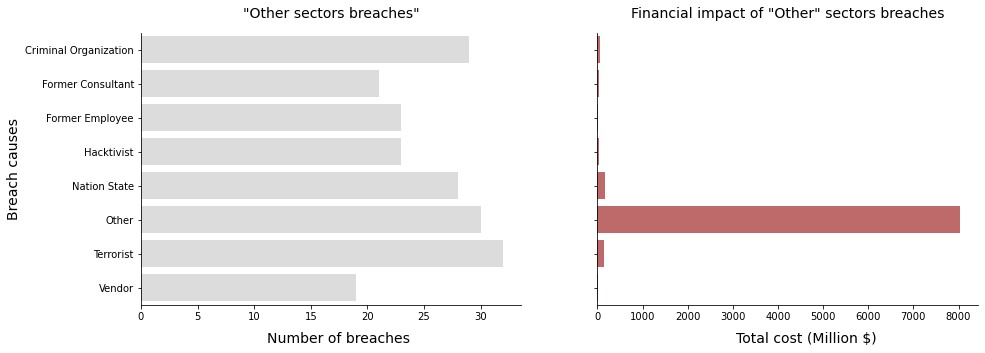

In [357]:
fig, ax = plt.subplots(1,2,
                       sharey = True,
                       figsize=(15,5))

sns.barplot(data=dataset26,
            x = "breaches",
            y = "cause",
            ci = None,
            color = 'gainsboro',
            ax=ax[0])

ax[0].set_title('"Other sectors breaches"',
                fontsize=14,
                pad = 15)
ax[0].set_xlabel('Number of breaches',
                 fontsize=14)
ax[0].set_ylabel('Breach causes',
                 fontsize=14)
ax[0].xaxis.set_label_coords(0.52, -0.10)
sns.despine()

sns.barplot(data=dataset26,
            x = "total_amount_million",
            y = 'cause',
            ci = None,
            color = 'indianred',
            ax=ax[1])

ax[1].set_title('Financial impact of "Other" sectors breaches',
                fontsize=14,
                pad = 15)
ax[1].set_xlabel('Total cost (Million $)',
                 fontsize=14)
ax[1].xaxis.set_label_coords(0.55, -0.10)
ax[1].set_ylabel('')


sns.despine()

plt.savefig("othersectors_by_cause.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

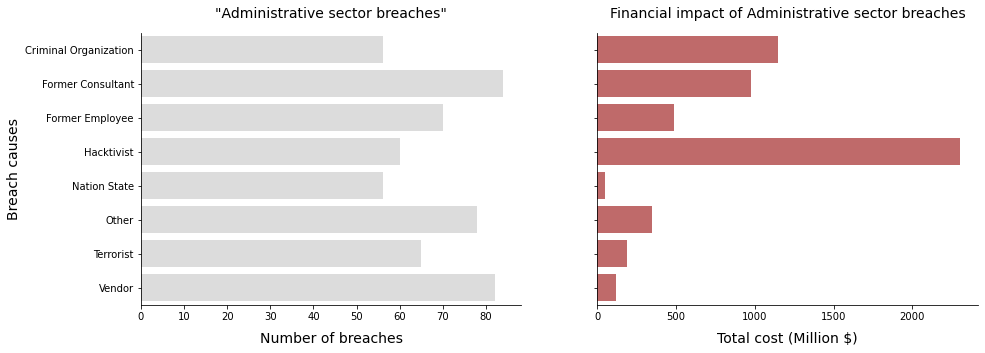

In [358]:
fig, ax = plt.subplots(1,2,
                       sharey = True,
                       figsize=(15,5))

sns.barplot(data=dataset27,
            x = "breaches",
            y = "cause",
            ci = None,
            color = 'gainsboro',
            ax=ax[0])

ax[0].set_title('"Administrative sector breaches"',
                fontsize=14,
                pad = 15)
ax[0].set_xlabel('Number of breaches',
                 fontsize=14)
ax[0].set_ylabel('Breach causes',
                 fontsize=14)
ax[0].xaxis.set_label_coords(0.50, -0.10)
sns.despine()

sns.barplot(data=dataset27,
            x = "total_amount_million",
            y = 'cause',
            ci = None,
            color = 'indianred',
            ax=ax[1])

ax[1].set_title('Financial impact of Administrative sector breaches',
                fontsize=14,
                pad = 15)
ax[1].set_xlabel('Total cost (Million $)',
                 fontsize=14)
ax[1].xaxis.set_label_coords(0.5, -0.10)
ax[1].set_ylabel('')


sns.despine()

plt.savefig("admsector_by_cause.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Qual a frequência de ataques do grupo "Other" por ano?

In [400]:
dataset28 = dataset1.loc[(dataset1['cause'] == "External - Other")]
dataset28

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,External - Other
15,16,2,488,51.0,518210.0,Information,29/12/2018,External - Other
24,25,2769,2177244,61.0,611110.0,Education,13/07/2018,External - Other
54,55,722,232155,23.0,238210.0,Construction,09/04/2014,External - Other
69,70,7353,101312,32.0,325212.0,Manufacturing,18/05/2016,External - Other
...,...,...,...,...,...,...,...,...
9945,9946,1,3621,62.0,621420.0,Healthcare,27/06/2020,External - Other
9948,9949,65,110471,52.0,525120.0,Financial,11/10/2017,External - Other
9953,9954,5372,1158085,71.0,712130.0,Entertainment,01/04/2015,External - Other
9972,9973,11,73178,54.0,541511.0,Professional,07/02/2019,External - Other


In [401]:
dataset29 = dataset28.dropna(subset=['cause'], axis=0, how='any')
dataset29.isnull().sum()

id                        0
affected_count            0
total_amount              0
naic_sector               7
naic_national_industry    7
sector                    7
breach_date               0
cause                     0
dtype: int64

In [402]:
dataset29['cause'] = dataset29['cause'].str.replace(r"External - ","")
dataset29

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
15,16,2,488,51.0,518210.0,Information,29/12/2018,Other
24,25,2769,2177244,61.0,611110.0,Education,13/07/2018,Other
54,55,722,232155,23.0,238210.0,Construction,09/04/2014,Other
69,70,7353,101312,32.0,325212.0,Manufacturing,18/05/2016,Other
...,...,...,...,...,...,...,...,...
9945,9946,1,3621,62.0,621420.0,Healthcare,27/06/2020,Other
9948,9949,65,110471,52.0,525120.0,Financial,11/10/2017,Other
9953,9954,5372,1158085,71.0,712130.0,Entertainment,01/04/2015,Other
9972,9973,11,73178,54.0,541511.0,Professional,07/02/2019,Other


In [403]:
dataset29['year'] = pd.DatetimeIndex(dataset29['breach_date']).year
dataset29

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other,2019
15,16,2,488,51.0,518210.0,Information,29/12/2018,Other,2018
24,25,2769,2177244,61.0,611110.0,Education,13/07/2018,Other,2018
54,55,722,232155,23.0,238210.0,Construction,09/04/2014,Other,2014
69,70,7353,101312,32.0,325212.0,Manufacturing,18/05/2016,Other,2016
...,...,...,...,...,...,...,...,...,...
9945,9946,1,3621,62.0,621420.0,Healthcare,27/06/2020,Other,2020
9948,9949,65,110471,52.0,525120.0,Financial,11/10/2017,Other,2017
9953,9954,5372,1158085,71.0,712130.0,Entertainment,01/04/2015,Other,2015
9972,9973,11,73178,54.0,541511.0,Professional,07/02/2019,Other,2019


In [404]:
dataset30 = dataset29.loc[(dataset29['cause'] == "Other")]
dataset30

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other,2019
15,16,2,488,51.0,518210.0,Information,29/12/2018,Other,2018
24,25,2769,2177244,61.0,611110.0,Education,13/07/2018,Other,2018
54,55,722,232155,23.0,238210.0,Construction,09/04/2014,Other,2014
69,70,7353,101312,32.0,325212.0,Manufacturing,18/05/2016,Other,2016
...,...,...,...,...,...,...,...,...,...
9945,9946,1,3621,62.0,621420.0,Healthcare,27/06/2020,Other,2020
9948,9949,65,110471,52.0,525120.0,Financial,11/10/2017,Other,2017
9953,9954,5372,1158085,71.0,712130.0,Entertainment,01/04/2015,Other,2015
9972,9973,11,73178,54.0,541511.0,Professional,07/02/2019,Other,2019


In [405]:
group1 = dataset30.groupby(['year']).sum()
group1

,id,affected_count,total_amount,naic_sector,naic_national_industry
year,,,,,
2011,362805,1194075,554060650,4072.0,40890942.0
2012,295571,140418,20489224,2997.0,30121525.0
2013,354125,269439,224615779,3932.0,39536557.0
2014,304005,123104,148210100,3101.0,31160056.0
2015,360981,4197205,97169627,4390.0,44110797.0
2016,295991,541522,108530851,3523.0,35399527.0
2017,404993,710191,140942221,4157.0,41786263.0
2018,397355,554956,285408938,4409.0,44282762.0
2019,361211,94121,542919030,3728.0,37433598.0


In [406]:
group1.to_csv('totalcost_other.csv', index = True);

In [407]:
arquivo = 'totalcost_other.csv'
dataset30 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset30

,year,id,affected_count,total_amount,naic_sector,naic_national_industry
0,2011,362805,1194075,554060650,4072.0,40890942.0
1,2012,295571,140418,20489224,2997.0,30121525.0
2,2013,354125,269439,224615779,3932.0,39536557.0
3,2014,304005,123104,148210100,3101.0,31160056.0
4,2015,360981,4197205,97169627,4390.0,44110797.0
5,2016,295991,541522,108530851,3523.0,35399527.0
6,2017,404993,710191,140942221,4157.0,41786263.0
7,2018,397355,554956,285408938,4409.0,44282762.0
8,2019,361211,94121,542919030,3728.0,37433598.0
9,2020,288675,831721,8101091825,3493.0,35089645.0


In [408]:
dataset30['total_amount_million'] = dataset30['total_amount']/1000000
dataset30

,year,id,affected_count,total_amount,naic_sector,naic_national_industry,total_amount_million
0,2011,362805,1194075,554060650,4072.0,40890942.0,554.060650
1,2012,295571,140418,20489224,2997.0,30121525.0,20.489224
2,2013,354125,269439,224615779,3932.0,39536557.0,224.615779
3,2014,304005,123104,148210100,3101.0,31160056.0,148.210100
4,2015,360981,4197205,97169627,4390.0,44110797.0,97.169627
5,2016,295991,541522,108530851,3523.0,35399527.0,108.530851
6,2017,404993,710191,140942221,4157.0,41786263.0,140.942221
7,2018,397355,554956,285408938,4409.0,44282762.0,285.408938
8,2019,361211,94121,542919030,3728.0,37433598.0,542.919030
9,2020,288675,831721,8101091825,3493.0,35089645.0,8101.091825


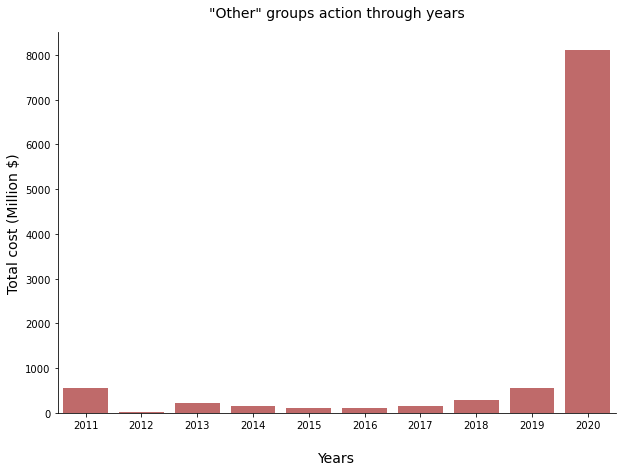

In [411]:
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=dataset30,
            x = "year",
            y = "total_amount_million",
            ci = None,
            color = 'indianred')

ax.set_title('"Other" groups action through years',
                fontsize=14,
                pad = 15)
ax.set_xlabel('Years',
                 fontsize=14)
ax.set_ylabel('Total cost (Million $)',
                 fontsize=14)
ax.xaxis.set_label_coords(0.5, -0.10)

sns.despine()

plt.savefig("totalcost_by_other.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Qual o perfil de ataque dos grupos Criminal Organization e Hacktivist considerando os custo desses ataques?

In [125]:
dataset31 = dataset1.loc[(dataset1['cause'] == "Criminal Organization") |
                         (dataset1['cause'] == "Hacktivist")]
dataset31

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
9,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization
13,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist
23,24,160,835181,81.0,813410.0,Other,02/02/2015,Criminal Organization
34,35,3,25835,56.0,561990.0,Administrative,16/12/2017,Criminal Organization
39,40,45,8359,52.0,524126.0,Financial,26/07/2018,Hacktivist
...,...,...,...,...,...,...,...,...
9929,9930,20,6443,61.0,611110.0,Education,12/04/2019,Hacktivist
9943,9944,12,73956,32.0,325413.0,Manufacturing,16/07/2019,Hacktivist
9966,9967,15525,1097651,31.0,315210.0,Manufacturing,09/10/2016,Criminal Organization
9983,9984,461,32852,62.0,621111.0,Healthcare,02/01/2017,Criminal Organization


In [126]:
dataset32 = dataset31.dropna(subset=['cause'], axis=0, how='any')
dataset32.isnull().sum()

id                         0
affected_count             0
total_amount               0
naic_sector               17
naic_national_industry    17
sector                    17
breach_date                0
cause                      0
dtype: int64

In [127]:
dataset33 = dataset32[['sector','total_amount','cause']]
dataset33

,sector,total_amount,cause
9,Information,25913,Criminal Organization
13,Construction,396347,Hacktivist
23,Other,835181,Criminal Organization
34,Administrative,25835,Criminal Organization
39,Financial,8359,Hacktivist
...,...,...,...
9929,Education,6443,Hacktivist
9943,Manufacturing,73956,Hacktivist
9966,Manufacturing,1097651,Criminal Organization
9983,Healthcare,32852,Criminal Organization


In [129]:
group1 = dataset33.groupby(['cause','sector']).sum()
group1

total_amount
cause                 sector                      
Criminal Organization Administrative    1143367621
                      Agriculture             8209
                      Construction        22054904
                      Education           45087798
                      Entertainment         711950
                      Financial           94077099
                      Healthcare         160270278
                      Hospitality         40476267
                      Information        119905037
                      Management          10095247
                      Manufacturing      189900646
                      Mining               1602502
                      Other               47863593
                      Professional       145203750
                      Public              32000232
                      Real Estate         78139911
                      Retail             609938473
                      Trade                3778383
                      Transportation       3312146
                      Utilities            6236795
Hacktivist            Administrative    2300555480
                      Agriculture           861526
                      Construction          712816
                      Education          226934129
                      Entertainment       13964975
                      Financial          242741254
                      Healthcare         479215329
                      Hospitality         27173557
                      Information        137283344
                      Management          98508476
                      Manufacturing       95765423
                      Mining                359278
                      Other               25498382
                      Professional      1090599375
                      Public              42700383
                      Real Estate          4684378
                      Retail              30824799
                      Trade               47467338
                      Transportation      28785605
                      Utilities             390409

In [130]:
group1.to_csv('totalcost_cause_sector.csv', index = True);

In [131]:
arquivo = 'totalcost_cause_sector.csv'
dataset33 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset33

,cause,sector,total_amount
0,Criminal Organization,Administrative,1143367621
1,Criminal Organization,Agriculture,8209
2,Criminal Organization,Construction,22054904
3,Criminal Organization,Education,45087798
4,Criminal Organization,Entertainment,711950
5,Criminal Organization,Financial,94077099
6,Criminal Organization,Healthcare,160270278
7,Criminal Organization,Hospitality,40476267
8,Criminal Organization,Information,119905037
9,Criminal Organization,Management,10095247


In [133]:
dataset33['total_amount_million'] = dataset33['total_amount']/1000000
dataset33

,cause,sector,total_amount,total_amount_million
0,Criminal Organization,Administrative,1143367621,1143.367621
1,Criminal Organization,Agriculture,8209,0.008209
2,Criminal Organization,Construction,22054904,22.054904
3,Criminal Organization,Education,45087798,45.087798
4,Criminal Organization,Entertainment,711950,0.711950
5,Criminal Organization,Financial,94077099,94.077099
6,Criminal Organization,Healthcare,160270278,160.270278
7,Criminal Organization,Hospitality,40476267,40.476267
8,Criminal Organization,Information,119905037,119.905037
9,Criminal Organization,Management,10095247,10.095247


In [164]:
dataset34 = dataset33.loc[(dataset33['cause'] == "Criminal Organization")]
dataset35 = dataset33.loc[(dataset33['cause'] == "Hacktivist")]

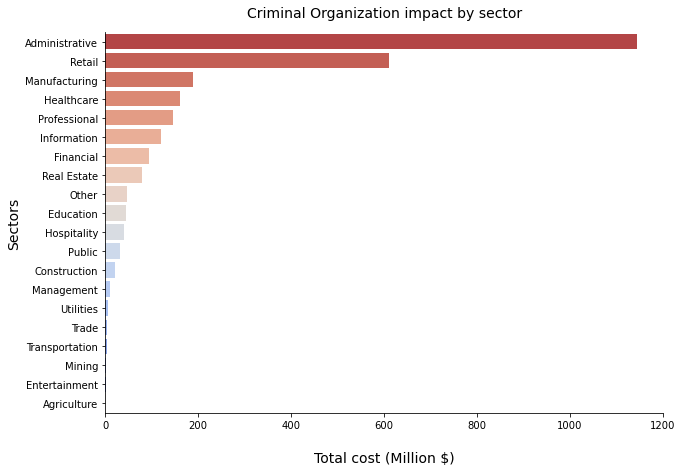

In [146]:
fig, ax = plt.subplots(figsize=(10,7))

ax = sns.barplot(data=dataset34,
            x = "total_amount_million",
            y = "sector",
            ci = None,
            palette = 'coolwarm_r',
            order=dataset34.sort_values('total_amount_million', ascending=False).sector)

ax.set_title('Criminal Organization impact by sector',
                fontsize=14,
                pad = 15)
ax.set_xlabel('Total cost (Million $)',
                 fontsize=14)
ax.set_ylabel('Sectors',
                 fontsize=14)
ax.xaxis.set_label_coords(0.50, -0.10)
sns.despine()

In [147]:
dataset34B = dataset34.loc[(dataset34['sector'] == "Manufacturing") |
                         (dataset34['sector'] == "Administrative") |
                         (dataset34['sector'] == "Professional") |
                         (dataset34['sector'] == "Healthcare") |
                         (dataset34['sector'] == "Retail")]
                        
dataset34B

,cause,sector,total_amount,total_amount_million
0,Criminal Organization,Administrative,1143367621,1143.367621
6,Criminal Organization,Healthcare,160270278,160.270278
10,Criminal Organization,Manufacturing,189900646,189.900646
13,Criminal Organization,Professional,145203750,145.203750
16,Criminal Organization,Retail,609938473,609.938473


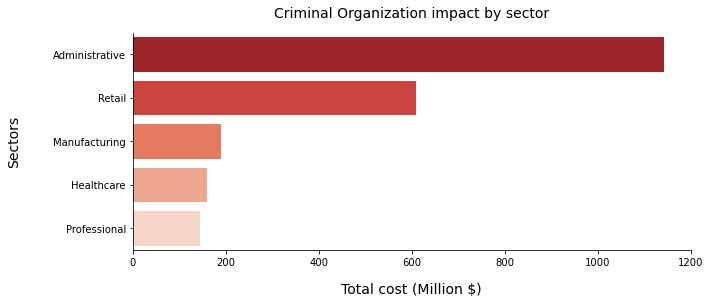

In [160]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=dataset34B,
            x = "total_amount_million",
            y = "sector",
            ci = None,
            palette = 'Reds_r',
            order=dataset34B.sort_values('total_amount_million', ascending=False).sector)

ax.set_title('Criminal Organization impact by sector',
                fontsize=14,
                pad = 15)
ax.set_xlabel('Total cost (Million $)',
                 fontsize=14)
ax.set_ylabel('Sectors',
                 fontsize=14)
ax.xaxis.set_label_coords(0.50, -0.15)
ax.yaxis.set_label_coords(-0.2, 0.5)
sns.despine()

plt.savefig("crim_org_cost.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

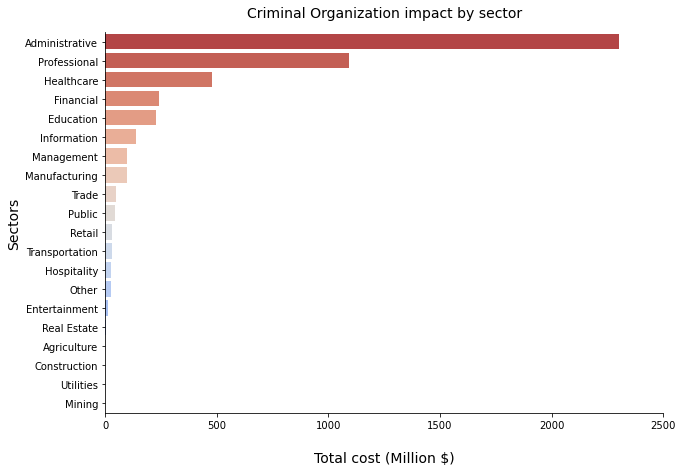

In [169]:
fig, ax = plt.subplots(figsize=(10,7))

ax = sns.barplot(data=dataset35,
            x = "total_amount_million",
            y = "sector",
            ci = None,
            palette = 'coolwarm_r',
            order=dataset35.sort_values('total_amount_million', ascending=False).sector)

ax.set_title('Criminal Organization impact by sector',
                fontsize=14,
                pad = 15)
ax.set_xlabel('Total cost (Million $)',
                 fontsize=14)
ax.set_ylabel('Sectors',
                 fontsize=14)
ax.xaxis.set_label_coords(0.50, -0.10)
ax.set_xlim([0.0, 2500])
sns.despine()

In [166]:
dataset35B = dataset35.loc[(dataset35['sector'] == "Financial") |
                         (dataset35['sector'] == "Administrative") |
                         (dataset35['sector'] == "Professional") |
                         (dataset35['sector'] == "Healthcare") |
                         (dataset35['sector'] == "Education")]
                        
dataset35B

,cause,sector,total_amount,total_amount_million
20,Hacktivist,Administrative,2300555480,2300.555480
23,Hacktivist,Education,226934129,226.934129
25,Hacktivist,Financial,242741254,242.741254
26,Hacktivist,Healthcare,479215329,479.215329
33,Hacktivist,Professional,1090599375,1090.599375


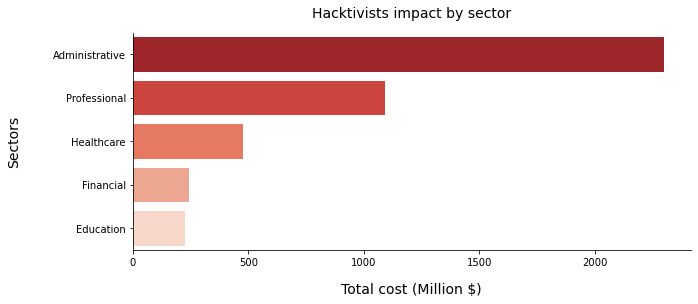

In [167]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=dataset35B,
            x = "total_amount_million",
            y = "sector",
            ci = None,
            palette = 'Reds_r',
            order=dataset35B.sort_values('total_amount_million', ascending=False).sector)

ax.set_title('Hacktivists impact by sector',
                fontsize=14,
                pad = 15)
ax.set_xlabel('Total cost (Million $)',
                 fontsize=14)
ax.set_ylabel('Sectors',
                 fontsize=14)
ax.xaxis.set_label_coords(0.50, -0.15)
ax.yaxis.set_label_coords(-0.2, 0.5)
sns.despine()

plt.savefig("hack_cost.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()